In [1]:
!pip install qiskit qiskit[visualization] qiskit_aer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 6.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 50.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 73.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 61.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 16.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.0/109.0 kB 6.6 MB/s eta 0:00:00
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=b1c83a358fa2047509092a5a3433b4708765d784ac011a0733ab06943ea1643b
  Stored in directory: /root/.cache/pip/wheels/b1/7a/33/9fdd892f784ed4afda62b685ae3703adf4c91aa0f524c28f03
Successfully built pylatexenc


In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from qiskit import QuantumCircuit
from qiskit import transpile
from qiskit_aer import AerSimulator
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_histogram, plot_bloch_multivector

In [4]:
from qiskit.quantum_info import Operator

In [5]:
Zmat = np.array([[1, 0], [0, -1]])
Zop = Operator(Zmat)

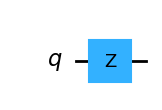

In [6]:
qc = QuantumCircuit(1)
qc.z(0)
qc.draw('mpl')

In [7]:
from scipy.linalg import expm

In [19]:
uni_1_mat = expm(-1j * np.pi/4 * Zmat)
uni_1_op = Operator(uni_1_mat)

In [15]:
print(uni_1_mat)

[[0.70710678-0.70710678j 0.        +0.j        ]
 [0.        +0.j         0.70710678+0.70710678j]]


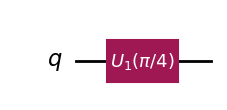

In [14]:
qc = QuantumCircuit(1)
qc.unitary(uni_1_op, 0, label='$U_1(\pi/4)$')
qc.draw('mpl')

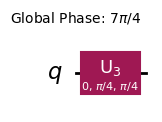

In [18]:
qc_trans = transpile(qc, basis_gates=['u3'])
qc_trans.draw('mpl')

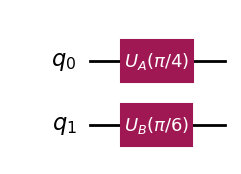

In [21]:
Zmat = np.array([[1, 0], [0, -1]])
Zop = Operator(Zmat)

Ymat = np.array([[0, -1j], [1j, 0]])
Yop = Operator(Ymat)

uni_A_mat = expm(-1j * np.pi/4 * Zmat)
uni_A_op = Operator(uni_A_mat)

uni_B_mat = expm(-1j * np.pi/6 * Ymat)
uni_B_op = Operator(uni_B_mat)

qc = QuantumCircuit(2)
qc.unitary(uni_A_op, 0, label='$U_A(\pi/4)$')
qc.unitary(uni_B_op, 1, label='$U_B(\pi/6)$')

qc.draw('mpl')

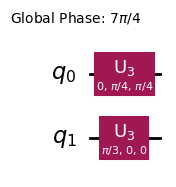

In [22]:
qc_trans = transpile(qc, basis_gates=['u3'])
qc_trans.draw('mpl')

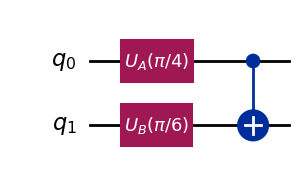

In [23]:
Zmat = np.array([[1, 0], [0, -1]])
Zop = Operator(Zmat)

Ymat = np.array([[0, -1j], [1j, 0]])
Yop = Operator(Ymat)

uni_A_mat = expm(-1j * np.pi/4 * Zmat)
uni_A_op = Operator(uni_A_mat)

uni_B_mat = expm(-1j * np.pi/6 * Ymat)
uni_B_op = Operator(uni_B_mat)

qc = QuantumCircuit(2)
qc.unitary(uni_A_op, 0, label='$U_A(\pi/4)$')
qc.unitary(uni_B_op, 1, label='$U_B(\pi/6)$')
qc.cx(0, 1)

qc.draw('mpl')

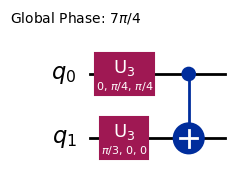

In [25]:
qc_trans = transpile(qc, basis_gates=['u3', 'cx'])
qc_trans.draw('mpl')

In [30]:
qc_trans.depth()

2

In [27]:
from qiskit.providers.fake_provider import GenericBackendV2

In [28]:
backend = GenericBackendV2(2)

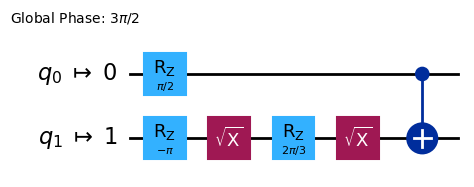

In [29]:
qc_trans_backend = transpile(qc, backend=backend)
qc_trans_backend.draw('mpl')

In [32]:
qc_trans_backend.depth()

5

In [33]:
Zmat = np.array([[1, 0], [0, -1]])
Zop = Operator(Zmat)

Ymat = np.array([[0, -1j], [1j, 0]])
Yop = Operator(Ymat)

In [35]:
np.shape(Zmat)

(2, 2)

In [36]:
np.shape(Ymat)

(2, 2)

In [39]:
mat = np.kron(Zmat, Ymat)
mat

array([[ 0.+0.j,  0.-1.j,  0.+0.j,  0.-0.j],
       [ 0.+1.j,  0.+0.j,  0.+0.j,  0.+0.j],
       [ 0.+0.j,  0.-0.j, -0.+0.j,  0.+1.j],
       [ 0.+0.j,  0.+0.j, -0.-1.j, -0.+0.j]])

In [40]:
np.shape(mat)

(4, 4)

In [41]:
U_2 = expm(1j * np.pi/7 * mat)
U_2

array([[ 0.90096887+0.j,  0.43388374+0.j,  0.        +0.j,
         0.        +0.j],
       [-0.43388374+0.j,  0.90096887+0.j,  0.        +0.j,
         0.        +0.j],
       [ 0.        +0.j,  0.        +0.j,  0.90096887+0.j,
        -0.43388374+0.j],
       [ 0.        +0.j,  0.        +0.j,  0.43388374+0.j,
         0.90096887+0.j]])

In [42]:
np.shape(U_2)

(4, 4)

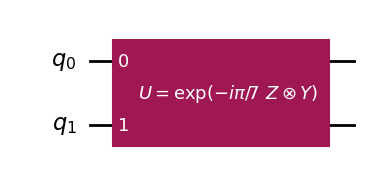

In [51]:
qc = QuantumCircuit(2)
qc.unitary(U_2, [0, 1],label='$U = \exp(-i \pi/7\,\, Z\otimes Y)$')
qc.draw('mpl')

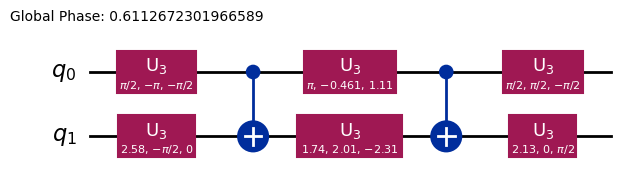

In [53]:
qc_trans = transpile(qc, basis_gates=['u3', 'cx'])
qc_trans.draw('mpl')

In [54]:
qc_trans.depth()

5

In [55]:
backend = GenericBackendV2(2)

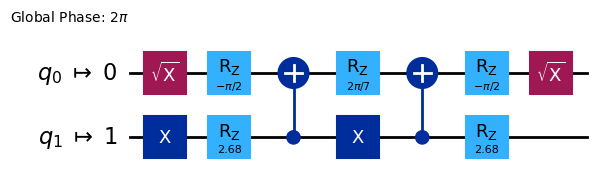

In [56]:
qc_trans_backend = transpile(qc, backend=backend)
qc_trans_backend.draw('mpl')

In [57]:
qc_trans_backend.depth()

7

In [59]:
from re import X
Zmat = np.array([[1, 0], [0, -1]])
Zop = Operator(Zmat)

Ymat = np.array([[0, -1j], [1j, 0]])
Yop = Operator(Ymat)

Xmat = np.array([[0, 1], [1, 0]])
Xop = Operator(Xmat)

mat = np.kron(np.kron(Zmat, Ymat), Xmat)
np.shape(mat)


(8, 8)

In [67]:
U_3 = expm(-1j * 0.3245 * mat)
U_3_op = Operator(U_3)
U_3

array([[ 0.94781026+0.j,  0.        +0.j,  0.        +0.j,
        -0.31883492+0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j,  0.        +0.j],
       [ 0.        +0.j,  0.94781026+0.j, -0.31883492+0.j,
         0.        +0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j,  0.        +0.j],
       [ 0.        +0.j,  0.31883492+0.j,  0.94781026+0.j,
         0.        +0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j,  0.        +0.j],
       [ 0.31883492+0.j,  0.        +0.j,  0.        +0.j,
         0.94781026+0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j,  0.        +0.j],
       [ 0.        +0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j,  0.94781026+0.j,  0.        +0.j,
         0.        +0.j,  0.31883492+0.j],
       [ 0.        +0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j,  0.        +0.j,  0.94781026+0.j,
         0.31883492+0.j,  0.        +0.j],
       [ 0.        +0.j,  0.      

In [68]:
np.shape(U_3_op)

(8, 8)

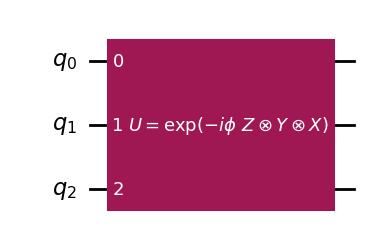

In [72]:
qc = QuantumCircuit(3)
qc.unitary(U_3_op, [0, 1, 2], label='$U = \exp(-i \phi \,\, Z\otimes Y\otimes X)$')
qc.draw('mpl')

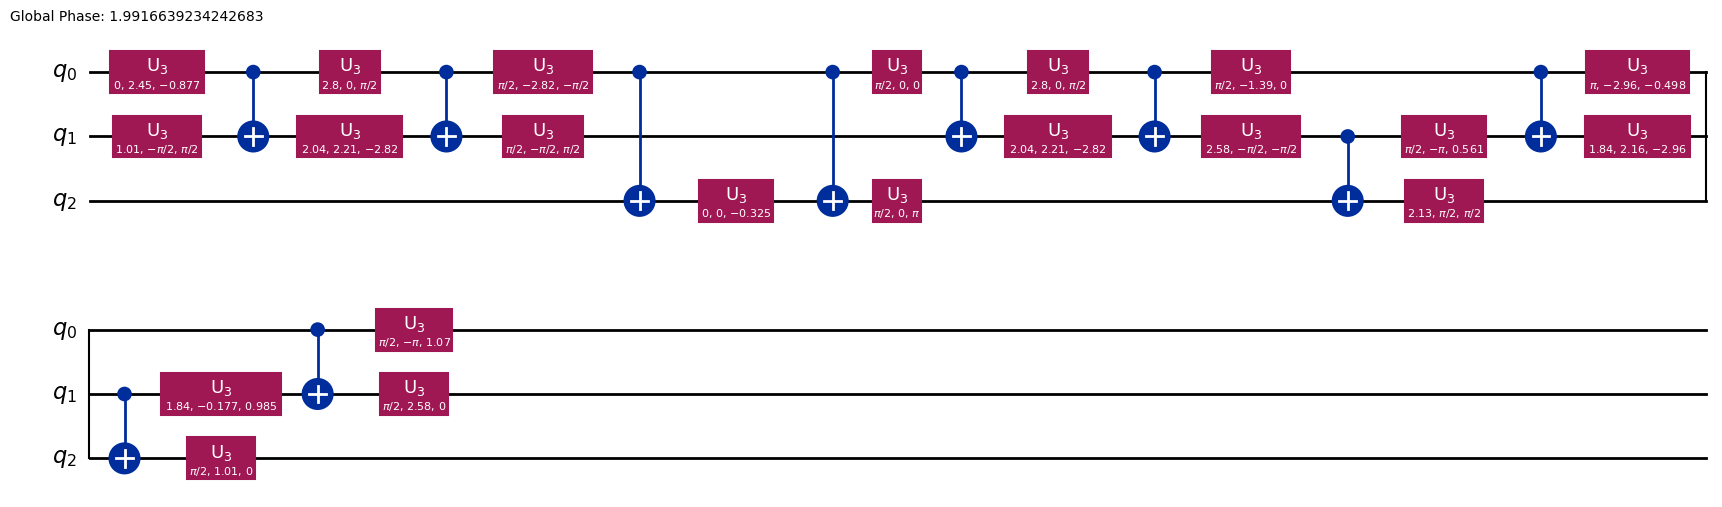

In [73]:
qc_trans = transpile(qc, basis_gates=['u3', 'cx'])
qc_trans.draw('mpl')

In [74]:
qc_trans.depth()

21

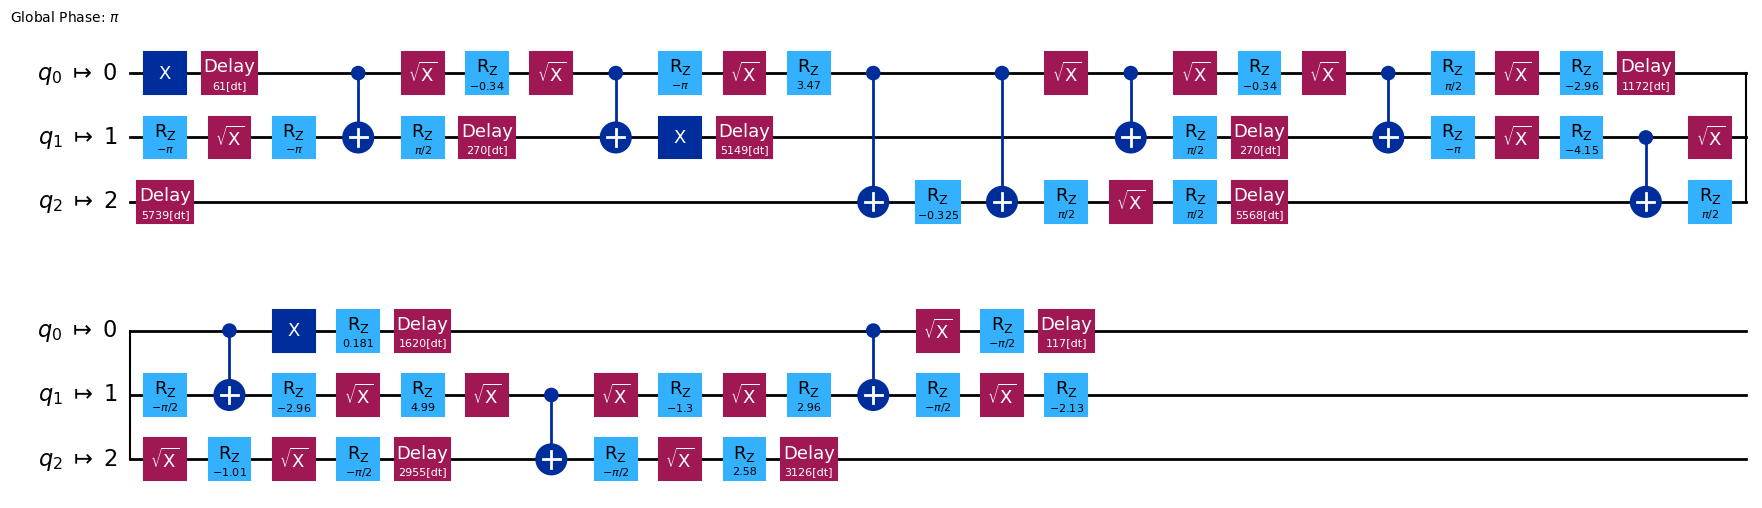

In [85]:
backend = GenericBackendV2(3)
qc_trans_backend = transpile(qc, backend=backend, scheduling_method = 'asap')
qc_trans_backend.draw('mpl')

In [86]:
qc_trans_backend.depth()

40

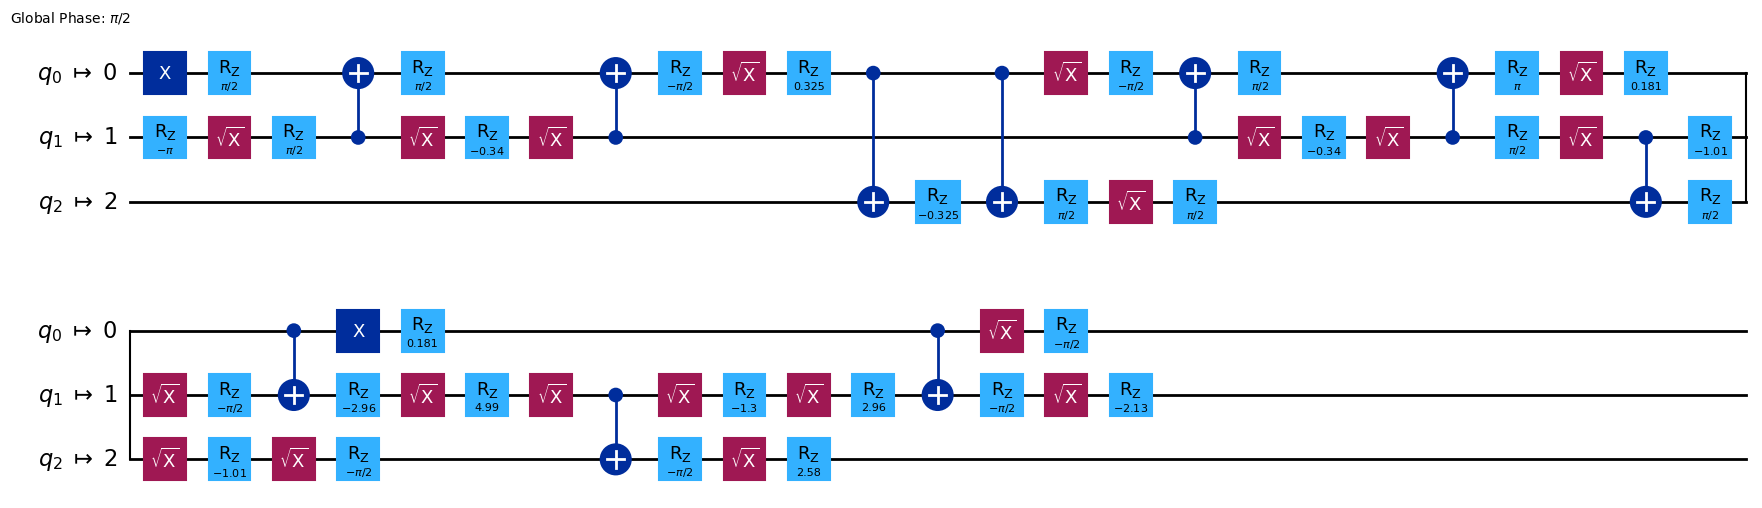

In [90]:
backend = GenericBackendV2(3)
qc_trans_backend = transpile(qc, backend=backend, optimization_level=3)
qc_trans_backend.draw('mpl')

In [91]:
qc_trans_backend.depth()

41